**Quantum Random Number Generator** : 

- Create a Python function take an input of a positive integer n and create a coresponding quantum circuit to generate a list of 2n (truly) random positive integers, each using a maximum of n bits and represent the result in decimals. Execute your circuit in a quantum simulator (or any Qiskit FakeBackend).
- Example: generate_random_list(3) - Output: [3, 2, 5, 1, 6, 7] 
- Hint: A simple quantum circuit is enough. You may only need to use 1 type of quantum gate, but feel free to be creative.

In [10]:
import qiskit
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer, execute
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
qiskit.__qiskit_version__

{'qiskit-terra': '0.23.2', 'qiskit-aer': '0.11.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.1', 'qiskit': '0.41.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

- We already know that quantum superposition is inherently random. We can leverage that to create a simple 
quantum random number generator

- We can easily create a superposition using a single gate ( the hadamard gate or the RX gate)

- n qubits can make 2^n numbers , we can later convert the binary to decimal for interpretable representation

In [11]:
def generate_random_list(n):
    q = QuantumRegister(n)
    c = ClassicalRegister(n)
    circuit = QuantumCircuit(q, c)
    
    # apply hadamard gate to n qubits
    for j in range(n):
        circuit.h(q[j])

    circuit.measure(q,c)

    job = execute(circuit, BasicAer.get_backend('qasm_simulator'), shots=4242)

    result = job.result().get_counts()
    output = []

    for bitstring in result:
        output.append( int(bitstring,2) )
    
    return output[:6] # for 2n outputs

In [12]:
print(generate_random_list(3))

[2, 1, 6, 4, 7, 0]


In [13]:
def generate_random_list_m(n,gate):
    q = QuantumRegister(n)
    c = ClassicalRegister(n)
    circuit = QuantumCircuit(q, c)
    
    # apply hadamard gate to n qubits
    for j in range(n):
        if gate == 'h':
            circuit.h(q[j])
        elif gate == 'rx':
            circuit.rx(np.pi/2,q[j])

    circuit.measure(q,c)

    job = execute(circuit, BasicAer.get_backend('qasm_simulator'), shots=4242)

    result = job.result().get_counts()
    output = []

    for bitstring in result:
        output.append( int(bitstring,2) )
    
    return output[:6] # for 2n outputs

In [14]:
print(generate_random_list_m(3,'rx'))

[0, 2, 6, 7, 1, 4]


In [27]:
def generate_random_list_graph(n):
    q = QuantumRegister(n)
    c = ClassicalRegister(n)
    circuit = QuantumCircuit(q, c)
    
    # apply hadamard gate to n qubits
    for j in range(n):
        circuit.h(q[j])

    circuit.measure(q,c)

    job = execute(circuit, BasicAer.get_backend('qasm_simulator'), shots=4242)

    result = job.result().get_counts()
    output = {}

    for bitstring in result:
        output[ int(bitstring,2) ] = result[bitstring]
        
    
    from qiskit.tools.visualization import plot_histogram    
    return plot_histogram(output)

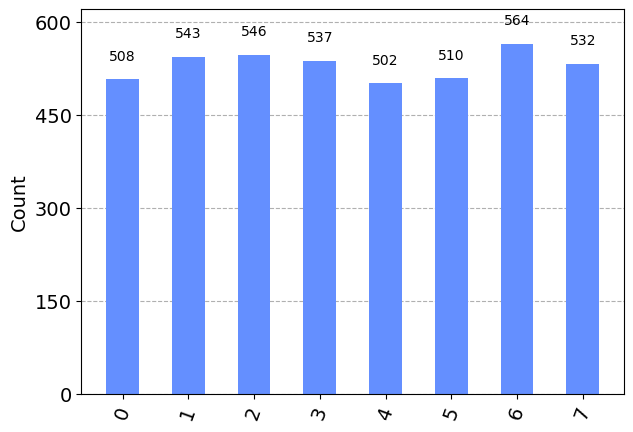

In [28]:
generate_random_list_graph(3)

References : 

- Qiskit tutorials
- https://digitalcommons.pace.edu/cgi/viewcontent.cgi?article=1295&context=honorscollege_theses
- DOI:10.47869/tcsj.75.4.14
- https://doi.org/10.1140/epjqt/s40507-023-00174-1
